# Obersvations

1)  It appears that on average, the average fair per ride is lower in cities where there are more rides.
2) On average, urban cities have the most number of drivers per city/town.
3) Urban cities have the most total rides, total drivers, and total fares of the three city types.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
cr_df = pd.merge(ride_df, city_df, on = "city")
# Display the data table for preview
cr_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

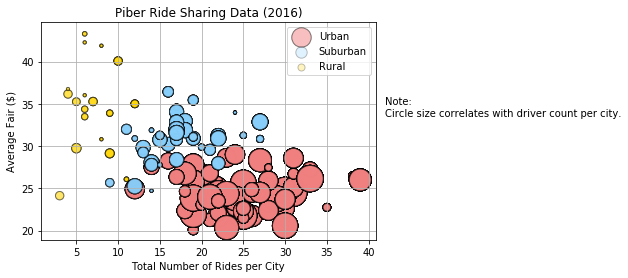

In [15]:
# Obtain the x and y coordinates for each of the three city types
x_coord = pd.DataFrame(cr_df.groupby('city')['ride_id'].count())
x_coord = x_coord.rename(columns = {'ride_id':'Total Rides'})
y_coord = pd.DataFrame(cr_df.groupby('city')['fare'].mean())
y_coord = y_coord.rename(columns = {'fare':'Average Fair'})
cr_df2 = pd.merge(cr_df, x_coord, left_on = 'city', right_index= True)
cr_df2 = pd.merge(cr_df2, y_coord, on = 'city')
u_x = cr_df2.loc[cr_df2['type'] == 'Urban', 'Total Rides']
u_y = cr_df2.loc[cr_df2['type'] == 'Urban', 'Average Fair']
u_z = cr_df2.loc[cr_df2['type'] == 'Urban', 'driver_count']
s_x = cr_df2.loc[cr_df2['type'] == 'Suburban', 'Total Rides']
s_y = cr_df2.loc[cr_df2['type'] == 'Suburban', 'Average Fair']
s_z = cr_df2.loc[cr_df2['type'] == 'Suburban', 'driver_count']
r_x = cr_df2.loc[cr_df2['type'] == 'Rural', 'Total Rides']
r_y = cr_df2.loc[cr_df2['type'] == 'Rural', 'Average Fair']
r_z = cr_df2.loc[cr_df2['type'] == 'Rural', 'driver_count']
# Build the scatter plots for each city types
area = (10 * u_x) 
urban = plt.scatter(u_x, u_y, s= 10 * u_z, color = 'lightcoral', edgecolor = 'black', 
                    label = 'Urban', alpha = .5)
suburban = plt.scatter(s_x, s_y, s= 10 * s_z, color = 'lightskyblue', edgecolor = 'black', 
                       label = 'Suburban', alpha = .25)
rural = plt.scatter(r_x, r_y,  s= 10 * r_z, color = 'gold', alpha = .25, edgecolor = 'black',
                    label = 'Rural')
plt.legend()
plt.xlabel('Total Number of Rides per City')
plt.ylabel('Average Fair ($)')
plt.title('Piber Ride Sharing Data (2016)')
plt.grid()

# Incorporate a text label regarding circle size
plt.text(42, 35, 'Note:')
plt.text(42, 33.5, 'Circle size correlates with driver count per city.')
# Save Figure
plt.savefig('scatter_pyber.png')

In [8]:
cr_df2.head()

,city,date,fare,ride_id,driver_count,type,Total Rides,Average Fair
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban,24,23.425833
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban,24,23.425833
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban,24,23.425833
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban,24,23.425833
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban,24,23.425833


In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

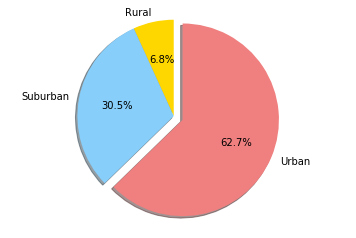

In [16]:
# Calculate Type Percents
tf_df = cr_df.groupby('type').sum()
colors = ['gold', 'lightskyblue', 'lightcoral']

# Build Pie Chart
pie = plt.pie(tf_df['fare'], explode = [0,0,.1], labels = tf_df.index.values, 
              colors = colors, autopct='%1.1f%%', shadow = True, startangle=90)
plt.axis('equal')
# Save Figure
plt.savefig('pie_fare.png')

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

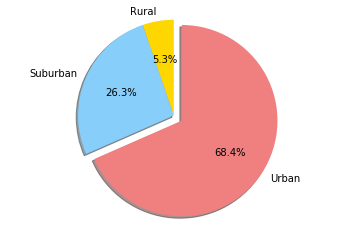

In [17]:
# Calculate Ride Percents
tr_df = cr_df.groupby('type').count()


# Build Pie Chart
pie = plt.pie(tr_df['ride_id'], explode = [0,0,.1], colors = colors,
              labels = tr_df.index.values, autopct='%1.1f%%', shadow = True, startangle=90)
plt.axis('equal')

# Save Figure
plt.savefig('pie_rides.png')

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

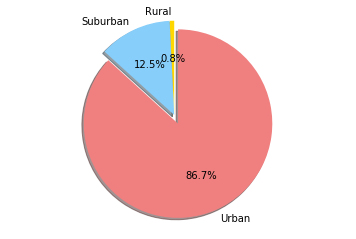

In [18]:
# Calculate Driver Percents
td_df = cr_df.groupby('type').sum()
td_df = td_df.drop(columns = ['fare', 'ride_id'])
td_df = td_df.rename(columns = {'driver_count':  'Total Drivers'})



# Build Pie Charts

pie = plt.pie(td_df['Total Drivers'], explode = [0,0,.1], colors = colors,
              labels = td_df.index.values, autopct='%1.1f%%', shadow = True, startangle=90)
plt.axis('equal')

# Save Figure
plt.savefig('pie_drivers.png')

In [ ]:
# Show Figure
cr_df.groupby('type').count()